# 03. Basic Agent
이 노트북은 가장 기초적인 **프롬프트 기반 에이전트**를 구현합니다.

In [7]:
# 환경 변수 불러오기 (선택): .env 사용 시
from dotenv import load_dotenv
load_dotenv()

import os

# Azure OpenAI 환경 변수 확인
AZURE_OPENAI_ENDPOINT = os.getenv("AZURE_OPENAI_ENDPOINT")
AZURE_OPENAI_KEY = os.getenv("AZURE_OPENAI_KEY")
AZURE_OPENAI_DEPLOYMENT_NAME = os.getenv("AZURE_OPENAI_DEPLOYMENT_NAME")

assert AZURE_OPENAI_ENDPOINT, "AZURE_OPENAI_ENDPOINT가 설정되어 있지 않습니다."
assert AZURE_OPENAI_KEY, "AZURE_OPENAI_KEY가 설정되어 있지 않습니다."
assert AZURE_OPENAI_DEPLOYMENT_NAME, "AZURE_OPENAI_DEPLOYMENT_NAME이 설정되어 있지 않습니다."

print(f"Endpoint: {AZURE_OPENAI_ENDPOINT}")
print(f"Deployment: {AZURE_OPENAI_DEPLOYMENT_NAME}")
print(f"Key: {AZURE_OPENAI_KEY[:10]}...{AZURE_OPENAI_KEY[-4:]}")  # 보안상 일부만 표시

Endpoint: https://eusonopenai.openai.azure.com/
Deployment: gpt-4o-mini
Key: 8jPfAc1tPQ...TUse


In [8]:
# Azure OpenAI SDK 사용
from openai import AzureOpenAI

client = AzureOpenAI(
    azure_endpoint=os.getenv("AZURE_OPENAI_ENDPOINT"),
    api_key=os.getenv("AZURE_OPENAI_KEY"),
    api_version="2024-02-15-preview"
)

In [9]:
# Select the GPT-4o model for text
model = os.getenv("AZURE_OPENAI_DEPLOYMENT_NAME")

In [10]:
def simple_agent(prompt: str, model: str = model) -> str:
    """아주 간단한 프롬프트 → 응답 함수"""
    completion = client.chat.completions.create(
        model=model,
        messages=[
            { "role": "system", "content": "You are a helpful AI assistant." },
            { "role": "user", "content": prompt },
        ],
        max_tokens=200,
        temperature=0.7,
    )
    return completion.choices[0].message.content.strip()


## Try it

In [11]:
user_prompt = "오늘 서울 날씨에 맞춰 오후 일정 추천해줘 (실외/실내 옵션 각각 1개씩)."
print(simple_agent(user_prompt))

오늘 서울 날씨에 따라 추천할 수 있는 오후 일정입니다.

**실외 옵션: 한강 공원 산책**
- 한강 공원에서 산책을 하거나 자전거를 타는 것은 좋은 선택입니다. 날씨가 맑고 기온이 적당하다면, 한강의 아름다운 경치를 즐기며 리프레시할 수 있습니다. 또한, 근처의 카페에서 음료를 즐기며 잠시 쉬는 것도 좋습니다.

**실내 옵션: 국립현대미술관 관람**
- 날씨가 좋지 않거나 덥다면, 국립현대미술관을 방문해보세요. 다양한 현대 미술 작품을 감상하며 문화적인 경험을 할 수 있습니다. 미술관 내 카페에서 차 한 잔 하며 여유로운 시간을 보내는 것도 추천합니다.

각 일정은 날씨에 따라 유동적으로 조정해보세요!


## Azure Open AI Assistant
Azure OpenAI Assistants를 사용하면 사용자 지정 지침과 코드 인터프리터, 사용자 지정 함수와 같은 고급 도구를 통해 필요에 맞는 AI 어시스턴트를 만들 수 있습니다. 이 문서에서는 Assistants API를 시작하는 방법에 대한 심층적인 가이드를 제공합니다

OpenAI Assistant 기능은 AI 에이전트(Agent)의 한 형태로 볼 수 있습니다. AI 에이전트는 사용자의 질문에 답변하거나 특정 작업을 수행하기 위해 설계된 소프트웨어입니다. OpenAI Assistant는 대화형 AI로, 자연어 처리와 다양한 내장 기능(예: 파일 검색, 웹 검색, 함수 호출 등)을 통해 사용자의 요청을 처리하는 점에서 에이전트 역할을 합니다.

### 어시스턴트 생성

In [15]:
import os
import json
from openai import AzureOpenAI
from dotenv import load_dotenv

# Load the environment variables from the .env file
load_dotenv(override=True)
    
client = AzureOpenAI(
    api_key=os.getenv("AZURE_OPENAI_KEY"),  
    api_version="2025-03-01-preview",
    azure_endpoint = os.getenv("AZURE_OPENAI_ENDPOINT"),
)

# Create an assistant
assistant = client.beta.assistants.create(
    name="Data Visualization",
    instructions=
    """
        당신은 데이터 기반으로 흥미로운 시각화를 만드는 유용한 AI 어시스턴트입니다.
        코드를 작성하고 테스트할 수 있는 샌드박스 환경에 접근할 수 있습니다.
        시각화 생성을 요청받으면 다음 단계를 따르세요:
        1. 코드를 작성하세요.
        2. 새로운 코드를 작성할 때마다 미리보기를 표시하여 작업 과정을 보여주세요.
        3. 코드를 실행하여 정상 동작하는지 확인하세요.
        4. 코드가 성공적으로 실행되면 시각화를 표시하세요.
        5. 코드 실행에 실패하면 오류 메시지를 표시하고, 코드를 수정하여 위 단계를 반복하세요.
    """,
    tools=[{"type": "code_interpreter"}],
    model = os.getenv("AZURE_OPENAI_DEPLOYMENT_NAME")
)

In [16]:
print(assistant.model_dump_json(indent=2))

{
  "id": "asst_JKdrJrw5vtoiAaCA8Dj9utzQ",
  "created_at": 1761819398,
  "description": null,
  "instructions": "\n        당신은 데이터 기반으로 흥미로운 시각화를 만드는 유용한 AI 어시스턴트입니다.\n        코드를 작성하고 테스트할 수 있는 샌드박스 환경에 접근할 수 있습니다.\n        시각화 생성을 요청받으면 다음 단계를 따르세요:\n        1. 코드를 작성하세요.\n        2. 새로운 코드를 작성할 때마다 미리보기를 표시하여 작업 과정을 보여주세요.\n        3. 코드를 실행하여 정상 동작하는지 확인하세요.\n        4. 코드가 성공적으로 실행되면 시각화를 표시하세요.\n        5. 코드 실행에 실패하면 오류 메시지를 표시하고, 코드를 수정하여 위 단계를 반복하세요.\n    ",
  "metadata": {},
  "model": "gpt-4o-mini",
  "name": "Data Visualization",
  "object": "assistant",
  "tools": [
    {
      "type": "code_interpreter"
    }
  ],
  "response_format": "auto",
  "temperature": 1.0,
  "tool_resources": {
    "code_interpreter": {
      "file_ids": []
    },
    "file_search": null
  },
  "top_p": 1.0
}


### 스레드 생성
스레드는 어시스턴트와 사용자 간의 대화 세션입니다. 스레드는 메시지를 저장하며 모델의 컨텍스트에 맞게 내용을 자동으로 잘라냅니다.

In [17]:
# Create a thread
thread = client.beta.threads.create()
print(thread)

/tmp/ipykernel_10197/4287771233.py:2: DeprecationWarning: The Assistants API is deprecated in favor of the Responses API
  thread = client.beta.threads.create()


Thread(id='thread_k2KD4737PdgjhkbHPC5iGSjG', created_at=1761819415, metadata={}, object='thread', tool_resources=ToolResources(code_interpreter=None, file_search=None))


In [18]:
# Add a user question to the thread
message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="사인파 시각화 만들기"
)

/tmp/ipykernel_10197/4158263082.py:2: DeprecationWarning: The Assistants API is deprecated in favor of the Responses API
  message = client.beta.threads.messages.create(


In [19]:
# list thread messages
thread_messages = client.beta.threads.messages.list(thread.id)
print(thread_messages.model_dump_json(indent=2))

/tmp/ipykernel_10197/838508738.py:2: DeprecationWarning: The Assistants API is deprecated in favor of the Responses API
  thread_messages = client.beta.threads.messages.list(thread.id)


{
  "data": [
    {
      "id": "msg_cswNfgeQx4vGkuMoZRHSONKl",
      "assistant_id": null,
      "attachments": [],
      "completed_at": null,
      "content": [
        {
          "text": {
            "annotations": [],
            "value": "사인파 시각화 만들기"
          },
          "type": "text"
        }
      ],
      "created_at": 1761819417,
      "incomplete_at": null,
      "incomplete_details": null,
      "metadata": {},
      "object": "thread.message",
      "role": "user",
      "run_id": null,
      "status": null,
      "thread_id": "thread_k2KD4737PdgjhkbHPC5iGSjG"
    }
  ],
  "has_more": false,
  "object": "list",
  "first_id": "msg_cswNfgeQx4vGkuMoZRHSONKl",
  "last_id": "msg_cswNfgeQx4vGkuMoZRHSONKl"
}


In [20]:
# create a thread
# you can also use intructions here to override the default instructions
run = client.beta.threads.runs.create(
  thread_id=thread.id,
  assistant_id=assistant.id,
)

/tmp/ipykernel_10197/622902181.py:3: DeprecationWarning: The Assistants API is deprecated in favor of the Responses API
  run = client.beta.threads.runs.create(


In [21]:
# retrieve thread status
# Retrieve the status of the run
run = client.beta.threads.runs.retrieve(
  thread_id=thread.id,
  run_id=run.id
)

status = run.status
print(status)

/tmp/ipykernel_10197/717643623.py:3: DeprecationWarning: The Assistants API is deprecated in favor of the Responses API
  run = client.beta.threads.runs.retrieve(


in_progress


In [22]:
# check the status of the run
import time
from IPython.display import clear_output

start_time = time.time()

status = run.status

while status not in ["completed", "cancelled", "expired", "failed"]:
    time.sleep(5)
    run = client.beta.threads.runs.retrieve(thread_id=thread.id,run_id=run.id)
    print("Elapsed time: {} minutes {} seconds".format(int((time.time() - start_time) // 60), int((time.time() - start_time) % 60)))
    status = run.status
    print(f'Status: {status}')
    clear_output(wait=True)

messages = client.beta.threads.messages.list(
  thread_id=thread.id
) 

print(f'Status: {status}')
print("Elapsed time: {} minutes {} seconds".format(int((time.time() - start_time) // 60), int((time.time() - start_time) % 60)))
print(messages.model_dump_json(indent=2))

Status: completed
Elapsed time: 0 minutes 9 seconds
{
  "data": [
    {
      "id": "msg_v8TZLUAtGuddWgiC8XDrZ2ux",
      "assistant_id": "asst_JKdrJrw5vtoiAaCA8Dj9utzQ",
      "attachments": [],
      "completed_at": null,
      "content": [
        {
          "image_file": {
            "file_id": "assistant-PBzNconErbepCb1Zbetvhn",
            "detail": null
          },
          "type": "image_file"
        },
        {
          "text": {
            "annotations": [],
            "value": "사인파 시각화를 성공적으로 생성했습니다! 그래프는 x축에 대한 사인 함수의 값을 보여줍니다. 이 그래프는 주기가 \\(2\\pi\\)인 사인파의 형태를 잘 나타내고 있습니다. 추가로 원하는 시각화나 변화를 요청해 주시면 도와드리겠습니다."
          },
          "type": "text"
        }
      ],
      "created_at": 1761819434,
      "incomplete_at": null,
      "incomplete_details": null,
      "metadata": {},
      "object": "thread.message",
      "role": "assistant",
      "run_id": "run_TL8o1QIC66KnPJkeBIQXEx9T",
      "status": null,
      "thread_id": "thread_k2KD4737PdgjhkbHPC5iGSjG"
    }

/tmp/ipykernel_10197/4219640742.py:17: DeprecationWarning: The Assistants API is deprecated in favor of the Responses API
  messages = client.beta.threads.messages.list(


In [23]:
messages = client.beta.threads.messages.list(
  thread_id=thread.id
)

print(messages.model_dump_json(indent=2))

{
  "data": [
    {
      "id": "msg_v8TZLUAtGuddWgiC8XDrZ2ux",
      "assistant_id": "asst_JKdrJrw5vtoiAaCA8Dj9utzQ",
      "attachments": [],
      "completed_at": null,
      "content": [
        {
          "image_file": {
            "file_id": "assistant-PBzNconErbepCb1Zbetvhn",
            "detail": null
          },
          "type": "image_file"
        },
        {
          "text": {
            "annotations": [],
            "value": "사인파 시각화를 성공적으로 생성했습니다! 그래프는 x축에 대한 사인 함수의 값을 보여줍니다. 이 그래프는 주기가 \\(2\\pi\\)인 사인파의 형태를 잘 나타내고 있습니다. 추가로 원하는 시각화나 변화를 요청해 주시면 도와드리겠습니다."
          },
          "type": "text"
        }
      ],
      "created_at": 1761819434,
      "incomplete_at": null,
      "incomplete_details": null,
      "metadata": {},
      "object": "thread.message",
      "role": "assistant",
      "run_id": "run_TL8o1QIC66KnPJkeBIQXEx9T",
      "status": null,
      "thread_id": "thread_k2KD4737PdgjhkbHPC5iGSjG"
    },
    {
      "id": "msg_cswNfgeQx4vGkuMoZRHSONKl",


/tmp/ipykernel_10197/708732456.py:1: DeprecationWarning: The Assistants API is deprecated in favor of the Responses API
  messages = client.beta.threads.messages.list(


In [24]:
# show the file name
data = json.loads(messages.model_dump_json(indent=2))  # Load JSON data into a Python object
image_file_id = data['data'][0]['content'][0]['image_file']['file_id']

print(image_file_id)  # Outputs: assistant-1YGVTvNzc2JXajI5JU9F0HMD

assistant-PBzNconErbepCb1Zbetvhn


In [25]:
# download the file
content = client.files.content(image_file_id)

image= content.write_to_file("sinewave.png")

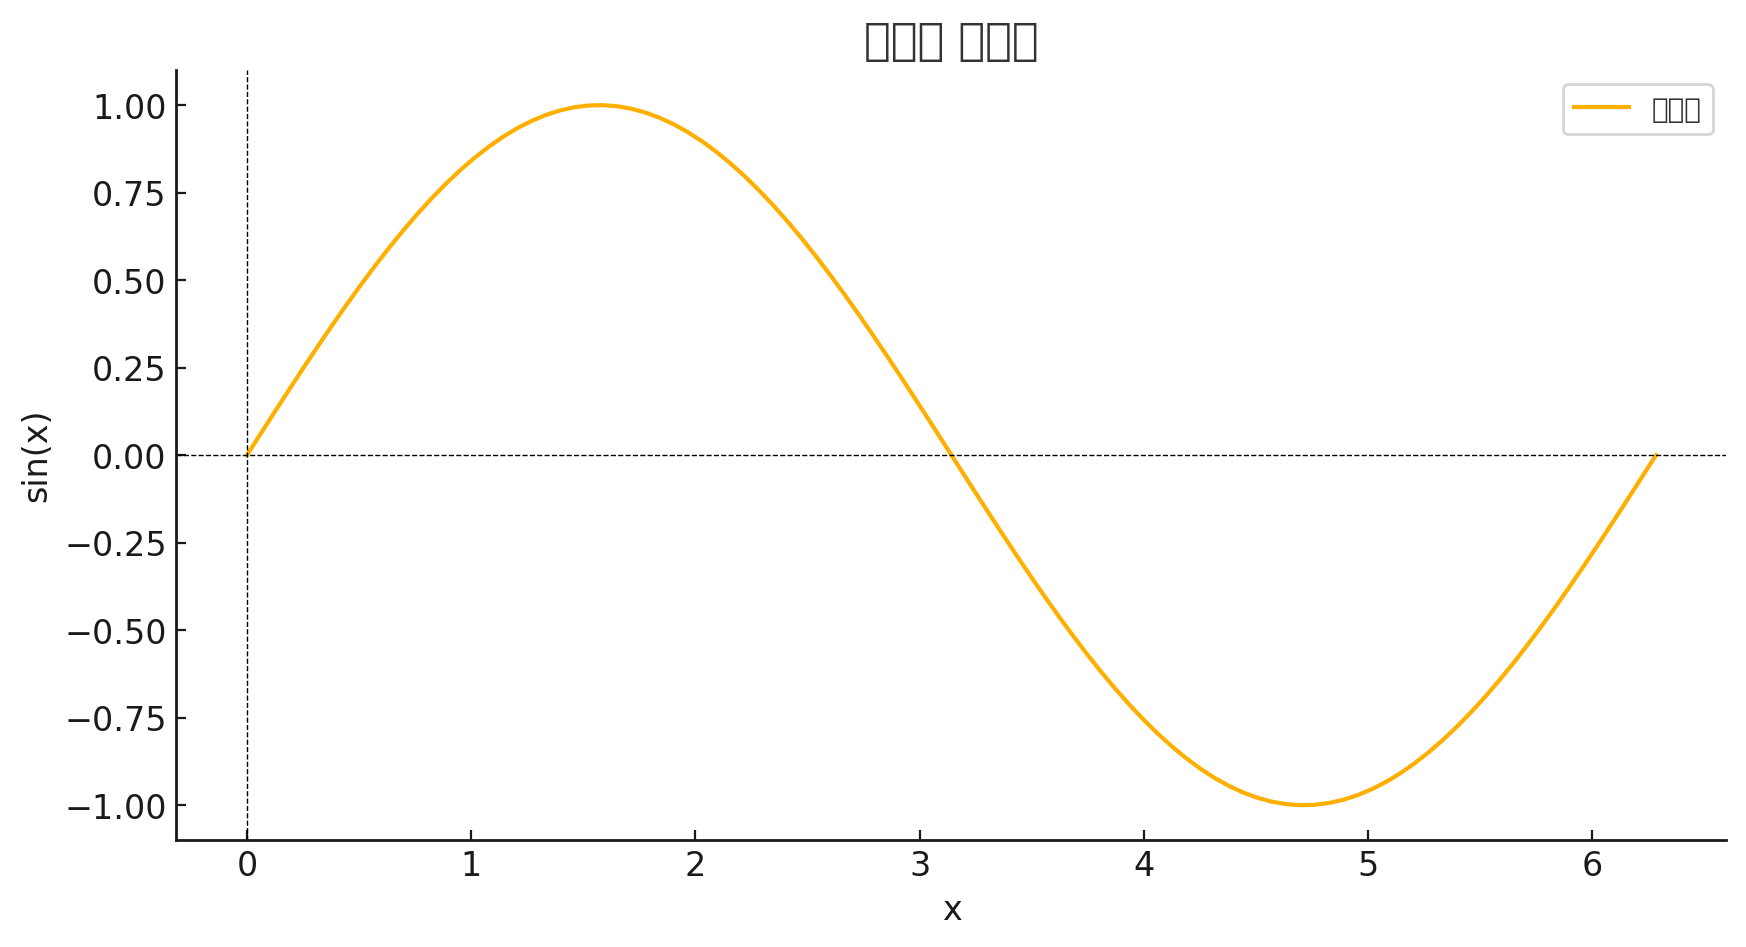

In [26]:
# rewrite the code to display the image in jupyter notebook

from PIL import Image

# Display the image in the default image viewer
image = Image.open("sinewave.png")
image.show()

후속 질문하기

In [27]:
# Add a new user question to the thread
message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="사인파를 생성하는 데 사용한 생성된 코드를 보여주세요."
)

/tmp/ipykernel_10197/3137014395.py:2: DeprecationWarning: The Assistants API is deprecated in favor of the Responses API
  message = client.beta.threads.messages.create(


In [28]:
run = client.beta.threads.runs.create(
  thread_id=thread.id,
  assistant_id=assistant.id,
  #instructions="New instructions" #You can optionally provide new instructions  but these will override the default instructions
)

# Retrieve the status of the run
run = client.beta.threads.runs.retrieve(
  thread_id=thread.id,
  run_id=run.id
)

status = run.status
print(status)

/tmp/ipykernel_10197/797602966.py:1: DeprecationWarning: The Assistants API is deprecated in favor of the Responses API
  run = client.beta.threads.runs.create(
/tmp/ipykernel_10197/797602966.py:8: DeprecationWarning: The Assistants API is deprecated in favor of the Responses API
  run = client.beta.threads.runs.retrieve(


queued


In [29]:
messages = client.beta.threads.messages.list(
  thread_id=thread.id
)

print(messages.model_dump_json(indent=2))

{
  "data": [
    {
      "id": "msg_SF9PE25915k2TYrzwfRFgXo3",
      "assistant_id": null,
      "attachments": [],
      "completed_at": null,
      "content": [
        {
          "text": {
            "annotations": [],
            "value": "사인파를 생성하는 데 사용한 생성된 코드를 보여주세요."
          },
          "type": "text"
        }
      ],
      "created_at": 1761819447,
      "incomplete_at": null,
      "incomplete_details": null,
      "metadata": {},
      "object": "thread.message",
      "role": "user",
      "run_id": null,
      "status": null,
      "thread_id": "thread_k2KD4737PdgjhkbHPC5iGSjG"
    },
    {
      "id": "msg_v8TZLUAtGuddWgiC8XDrZ2ux",
      "assistant_id": "asst_JKdrJrw5vtoiAaCA8Dj9utzQ",
      "attachments": [],
      "completed_at": null,
      "content": [
        {
          "image_file": {
            "file_id": "assistant-PBzNconErbepCb1Zbetvhn",
            "detail": null
          },
          "type": "image_file"
        },
        {
          "text": {
   

/tmp/ipykernel_10197/708732456.py:1: DeprecationWarning: The Assistants API is deprecated in favor of the Responses API
  messages = client.beta.threads.messages.list(


In [30]:
# Print the code
data = json.loads(messages.model_dump_json(indent=2))
code = data['data'][0]['content'][0]['text']['value']
print(code)

사인파를 생성하는 데 사용한 생성된 코드를 보여주세요.
